In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import astropy.io.fits as fits
import numpy as np
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.visualization.wcsaxes import add_beam, add_scalebar

### CHIME Data

In [3]:
fn = '/srv/data/chime/tadpole_cutout_Mar2024/IQUV_400_729/Q_400_729_Mar2024_tadpole_gal.fits'
hdr_chimeQ = fits.getheader(fn)
chimeQ = fits.getdata(fn)
wcs_chime = WCS(hdr_chimeQ)

fn = '/srv/data/chime/tadpole_cutout_Mar2024/IQUV_400_729/U_400_729_Mar2024_tadpole_gal.fits'
hdr_chimeU = fits.getheader(fn)
chimeU = fits.getdata(fn)


chime_pI = np.sqrt(chimeQ**2 + chimeU**2)
chime_pA = 0.5*np.arctan2(chimeU, chimeQ)

In [6]:
ymin_chime, ymax_chime = np.fix(wcs_chime.wcs_world2pix(1, [2, 11], 1, 1)[1])
xmin_chime, xmax_chime = np.fix(wcs_chime.wcs_world2pix([128,141], 1, 1, 1)[0])


xhead_chime, yhead_chime = np.fix(wcs_chime.celestial.wcs_world2pix(137.08,7.2, 1))
xtail_chime, ytail_chime = np.fix(wcs_chime.celestial.wcs_world2pix(134,6.6, 1))
xoff_chime,  yoff_chime = np.fix(wcs_chime.celestial.wcs_world2pix(135,9.5, 1))

### WSRT 150 MHz
WSRT 150 MHz is at a Faraday depth of -10 rad/m2

-10 rad/m2 slice from WSRT150 was reporjected from Equitoral by 
'../Paper_update/galactic_conversion_wsrt150'

In [7]:
fn = ('/srv/nmohamme/data2/WSRT_Q150M_FDF.gal.FITS')
hdr_wsrt150Q = fits.getheader(fn)
wsrt150Q = fits.getdata(fn)
wcs_wsrt150 = WCS(hdr_wsrt150Q)

fn = ('/srv/nmohamme/data2/WSRT_U150M_FDF.gal.FITS')
hdr_wsrt150U = fits.getheader(fn)
wsrt150U = fits.getdata(fn)

fn = ('/srv/nmohamme/data2/WSRT_PI150M_FDF.gal.FITS')
hdr_wsrt150_pI = fits.getheader(fn)
wsrt150_pI = fits.getdata(fn)

In [8]:
wsrt150_pA = 0.5*np.arctan2(wsrt150U, wsrt150Q)

In [11]:
ymin_150, ymax_150 = np.fix(wcs_wsrt150.wcs_world2pix(128, [2,11], 1, 1)[1])
xmin_150, xmax_150 = np.fix(wcs_wsrt150.wcs_world2pix([128,141], 11, 1,1)[0])

In [15]:
ymin_150, ymax_150 = np.fix(wcs_wsrt150.wcs_world2pix(128, [2,11], 1, 1)[1])
xmin_150, xmax_150 = np.fix(wcs_wsrt150.wcs_world2pix([128,141], 11, 1,1)[0])
xpix_150, ypix_150 = np.fix(wcs_wsrt150.wcs_world2pix(137.45706817862768,7.06094581066827, 1,1)[0:2])

xhead_150, yhead_150 = np.fix(wcs_wsrt150.celestial.wcs_world2pix(137.1,7.1, 1))
xtail_150, ytail_150 = np.fix(wcs_wsrt150.celestial.wcs_world2pix(134,6.6, 1))
xoff_150,  yoff_150 = np.fix(wcs_wsrt150.celestial.wcs_world2pix(135,9.5, 1))

In [19]:
from RMutils.util_RM import get_rmsf_planes
freq = np.arange(138e6, 156e6, 9.8e3)
lsq = (3e8/freq)**2
rmsfplanes_out = get_rmsf_planes(lsq, np.arange(-30,30,0.1), fitRMSF=True)
print(rmsfplanes_out)

(array([0.01292213+0.0079658j , 0.01331236+0.00848437j,
       0.01356944+0.0089115j , ..., 0.01368905-0.00924408j,
       0.01356944-0.0089115j , 0.01331236-0.00848437j]), array([-60. , -59.9, -59.8, ...,  59.7,  59.8,  59.9]), array(3.7269564, dtype=float32), array(1))


In [17]:
mom0 = np.sum(wsrt150_pI[41:56], axis=0)*3.72 #times RMSF FWHM

### WSRT 349 MHz
WSRT 349 was reprojected from Equitorial by '../Paper_update/galactic_conversion_wsrt350'

In [31]:
fn = ('/srv/nmohamme/data2/RING.B3Q.350M.gal.FITS')
hdr_wsrt349Q = fits.getheader(fn)
wsrt349Q = fits.getdata(fn)
wcs_wsrt349 = WCS(hdr_wsrt349Q)

fn =  ('/srv/nmohamme/data2/RING.B3U.350M.gal.FITS')
hdr_wsrt349U = fits.getheader(fn)
wsrt349U = fits.getdata(fn)

fn = ('/srv/nmohamme/data2/RING.B3PI.350M.gal.FITS')
hdr_wsrt349_pI = fits.getheader(fn)
wsrt349_pI = fits.getdata(fn)[0]

In [33]:
wsrt349_pA = 0.5*np.arctan2(wsrt349U, wsrt349Q)[0]

In [23]:
ymin_349, ymax_349 = np.fix(wcs_wsrt349.wcs_world2pix(128, [2,11], 1, 1)[1])
xmin_349, xmax_349 = np.fix(wcs_wsrt349.wcs_world2pix([128,141], 11, 1, 1)[0])

In [25]:
xpix_349, ypix_349 = np.fix(wcs_wsrt349.wcs_world2pix(137.45706817862768,7.06094581066827, 1, 1)[0:2])

xhead_349, yhead_349 = np.fix(wcs_wsrt349.celestial.wcs_world2pix(137.1,7.1, 1))
xtail_349, ytail_349 = np.fix(wcs_wsrt349.celestial.wcs_world2pix(134,6.6, 1))
xoff_349, yoff_349 = np.fix(wcs_wsrt349.celestial.wcs_world2pix(135,9.5, 1))

### DRAO Synthesis Telescope


In [26]:
fn = ('/srv/data/st/L137_lense/new_tadpole/new_tadpole_combined_q.fits')
header_stQ = fits.getheader(fn)
wcs_st = WCS(header_stQ)
stQ = fits.getdata(fn)

fn = ('/srv/data/st/L137_lense/new_tadpole/new_tadpole_combined_u.fits')
header_stU = fits.getheader(fn)
stU = fits.getdata(fn)

In [27]:
st_pI = np.sqrt(stQ**2 +  stU**2)
st_pA = 0.5*np.arctan2(stU, stQ)

In [28]:
ymin_st, ymax_st = np.fix(wcs_st.wcs_world2pix(128, [2, 11], 1)[1])
xmin_st, xmax_st = np.fix(wcs_st.wcs_world2pix([128,141], 11, 1)[0])

In [29]:
xpix_st, ypix_st = np.fix(wcs_st.wcs_world2pix(137.45706817862768,7.06094581066827, 1))

xhead_st, yhead_st = np.fix(wcs_st.celestial.wcs_world2pix(137.1,7.1, 1))
xtail_st, ytail_st = np.fix(wcs_st.celestial.wcs_world2pix(134,6.6, 1))
xoff_st, yoff_st = np.fix(wcs_st.celestial.wcs_world2pix(135,9.5, 1))

### Superfigure

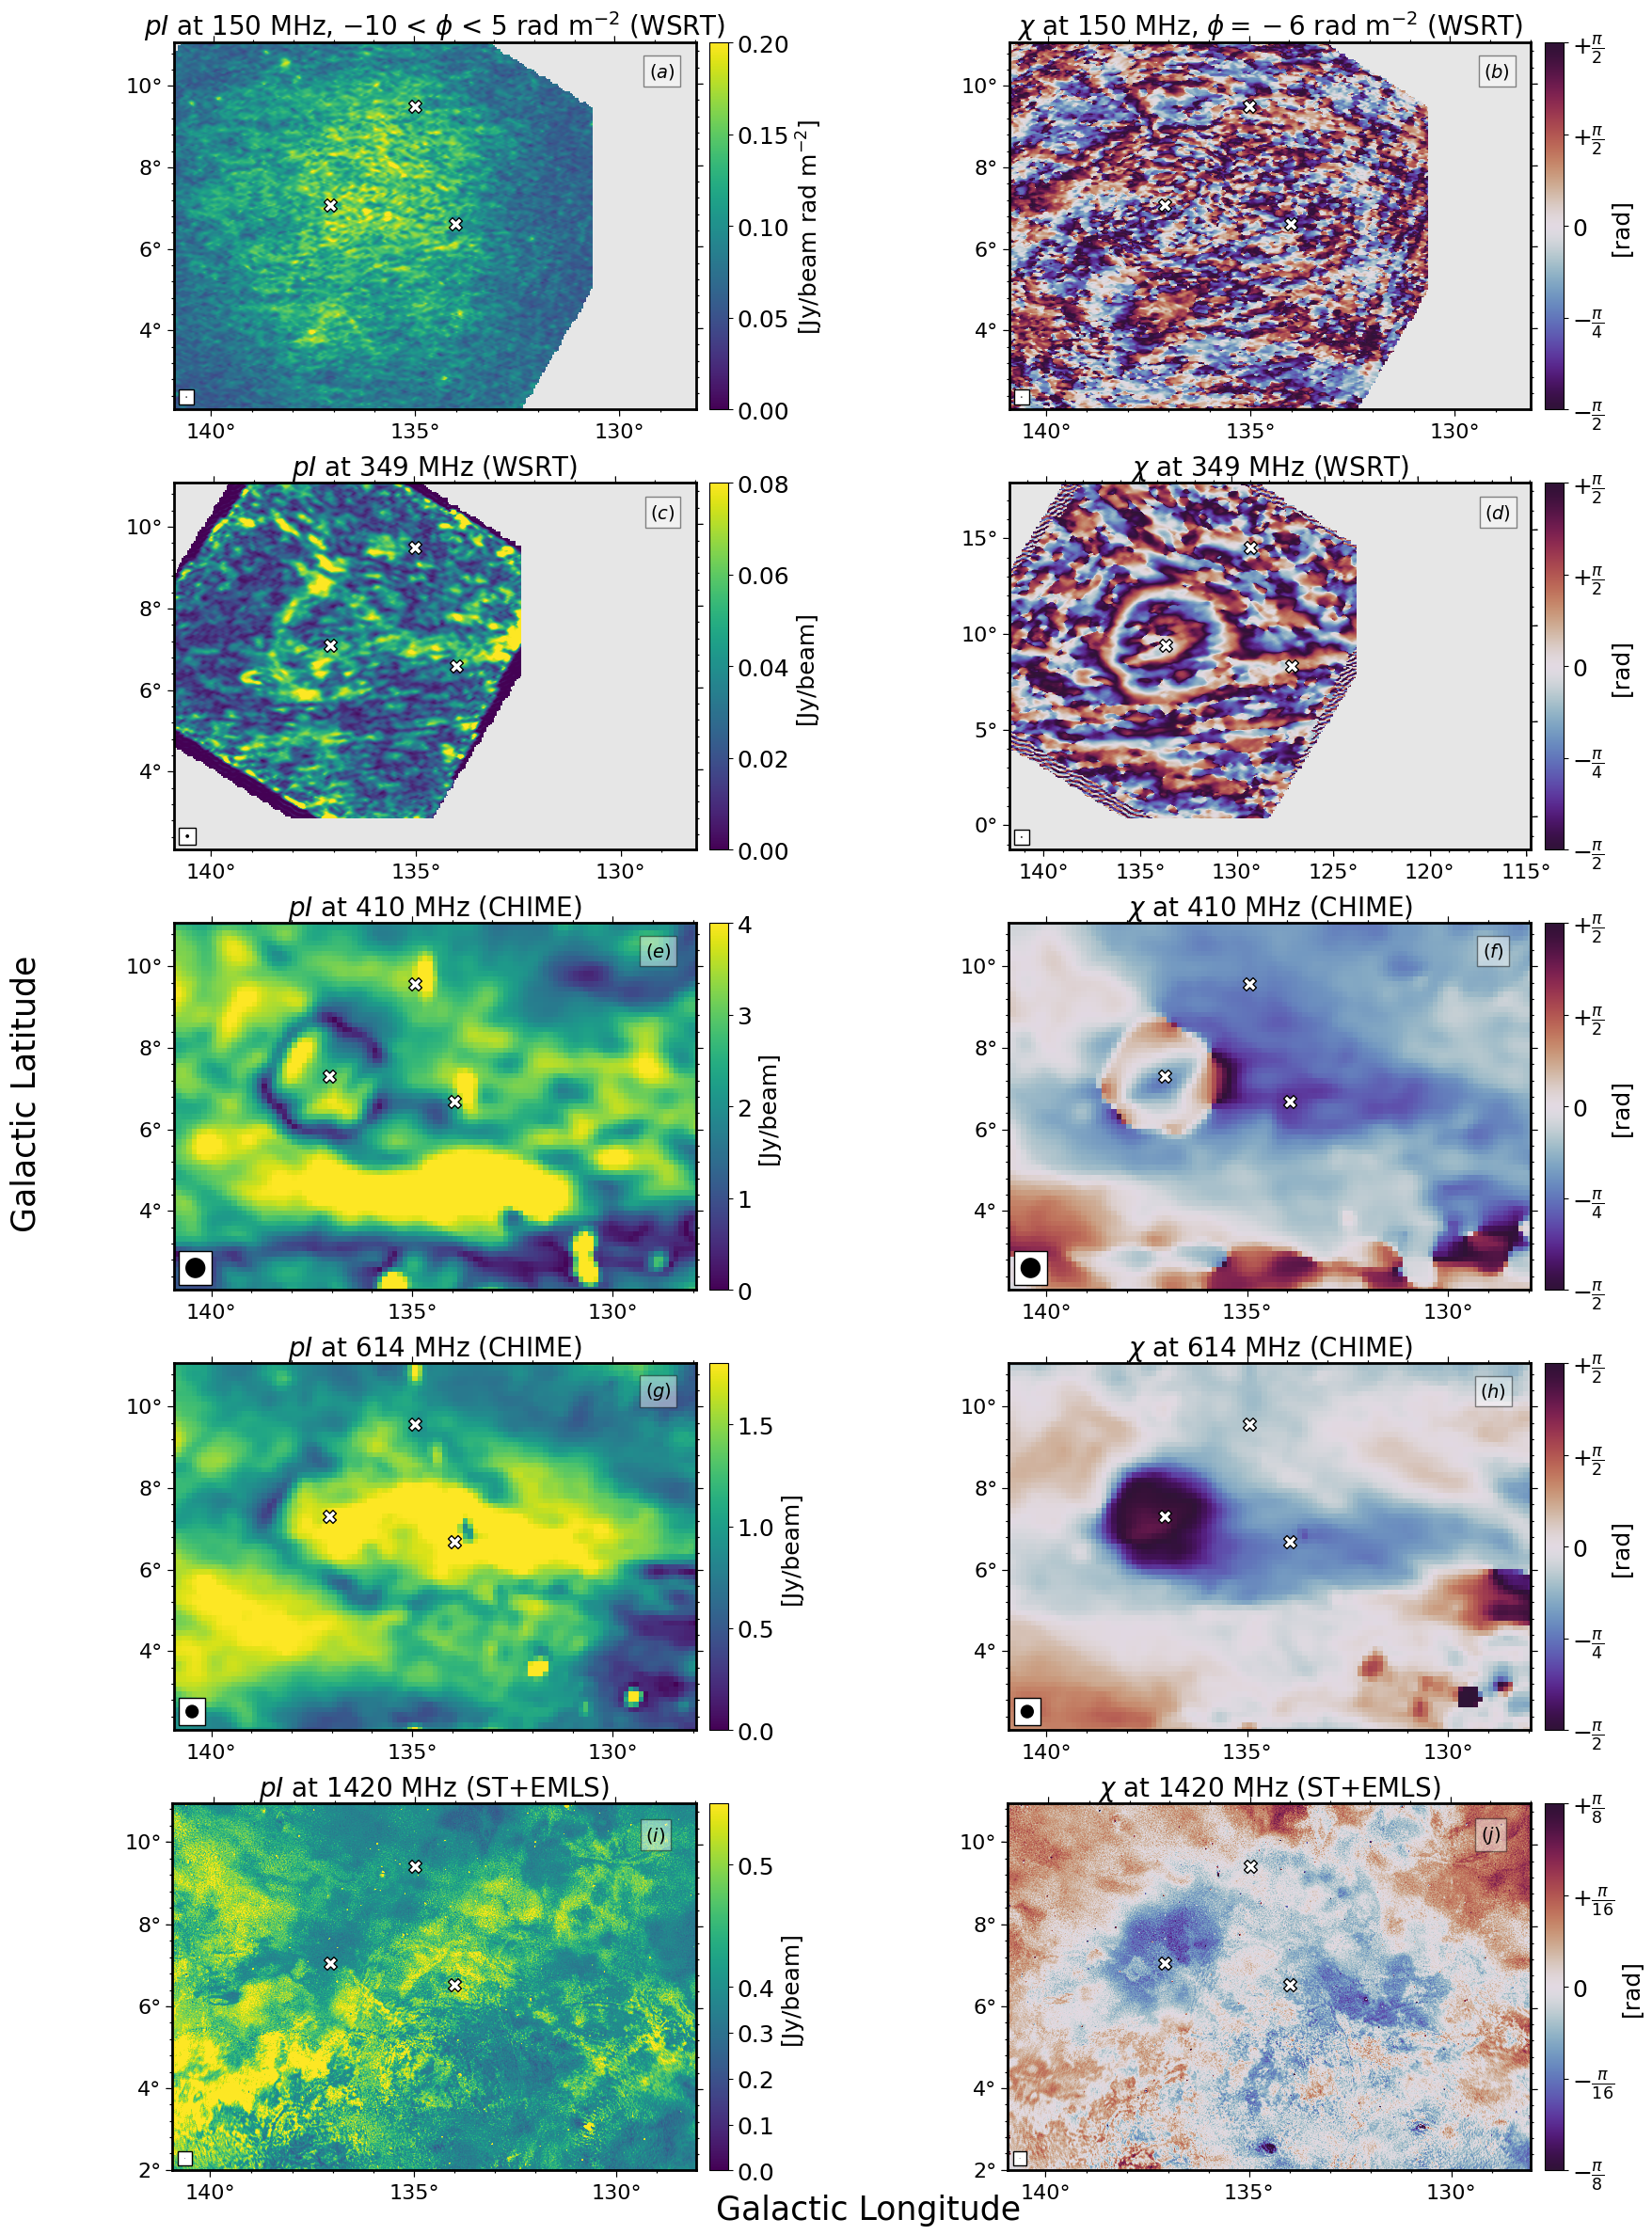

In [35]:
fig = plt.figure(figsize=(21, 29.375))


#--------------------------------------------------------------------- WSRT 150 Plots
#----------------------------------------------------------------- pI
ax = fig.add_subplot(521, projection=wcs_wsrt150.celestial)
im = ax.imshow(mom0, cmap='viridis', vmin=0, vmax=0.2)
ax.scatter(xhead_150,  yhead_150, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter(xtail_150,  ytail_150, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter( xoff_150,   yoff_150, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.set_facecolor('0.9')

ax.set_ylim(ymin_150, ymax_150)
ax.set_xlim(xmax_150, xmin_150) #note the flip in xman and xmin
ax.set_title(r"$pI$ at $150$ MHz, $-10$ < $\phi$ < $5$ rad m$^{-2}$ (WSRT)", 
             fontsize=20)
ax.set_xlabel(" ")
ax.set_ylabel(" ")

ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(r'[Jy/beam rad m$^{-2}$]', fontsize=18)
ax.text(wcs_wsrt150.wcs_world2pix(129, 1, 1, 1)[0], wcs_wsrt150.wcs_world2pix(1, -0.6, 1, 1)[1],
        r'$(a)$', fontsize=14, bbox={'facecolor':'white', 'alpha':0.45, 'edgecolor':'k'}, ha='center', va='center')
add_beam(ax, major=2.1*u.arcmin, minor=2.1*u.arcmin, angle=0, frame=True, facecolor='k')
#----------------------------------------------------------------- pA
ax = fig.add_subplot(522, projection=wcs_wsrt150.celestial)
im = ax.imshow(wsrt150_pA[45], cmap='twilight_shifted', vmin=-np.pi/2, vmax=np.pi/2, interpolation='none')
ax.scatter(xhead_150,  yhead_150, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter(xtail_150,  ytail_150, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter( xoff_150,   yoff_150, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.set_facecolor('0.9')

ax.set_ylim(ymin_150, ymax_150)
ax.set_xlim(xmax_150, xmin_150)
ax.set_title(r"$\chi$ at $150$ MHz, $\phi = -6$ rad m$^{-2}$ (WSRT)", 
             fontsize=20)
ax.set_xlabel(" ")
ax.set_ylabel(" ")
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02, ticks=[-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_yticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", r"$0$", r"$+\frac{\pi}{2}$", r"$+\frac{\pi}{2}$"])
cbar.set_label("[rad]", fontsize=18)
ax.text(wcs_wsrt150.wcs_world2pix(129, 1, 1, 1)[0], wcs_wsrt150.wcs_world2pix(1, -0.6, 1, 1)[1],
        r'$(b)$', fontsize=14, bbox={'facecolor':'white', 'alpha':0.45, 'edgecolor':'k'}, ha='center', va='center')
add_beam(ax, major=2.1*u.arcmin, minor=2.1*u.arcmin, angle=0, frame=True, facecolor='k')
#--------------------------------------------------------------------- WSRT 349 Plots
#----------------------------------------------------------------- pI
ax = fig.add_subplot(523, projection=wcs_wsrt349.celestial)
im = ax.imshow(wsrt349_pI, cmap='viridis', vmin=0,vmax=0.08)
ax.scatter(xhead_349,  yhead_349, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter(xtail_349,  ytail_349, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter( xoff_349,   yoff_349, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.set_facecolor('0.9')

ax.set_ylim(ymin_349, ymax_349)
ax.set_xlim(xmax_349, xmin_349) #note the flip in xman and xmin
ax.set_title(r"$pI$ at 349 MHz (WSRT)", 
             fontsize=20)
ax.set_xlabel(" ")
ax.set_ylabel(" ")
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('[Jy/beam]', fontsize=18)
ax.text(wcs_wsrt349.celestial.wcs_world2pix(129, 1, 1)[0], wcs_wsrt349.celestial.wcs_world2pix(1, -2.2, 1)[1],
        r'$(c)$', fontsize=14, bbox={'facecolor':'white', 'alpha':0.45, 'edgecolor':'k'}, ha='center', va='center')
add_beam(ax, major=5.25*u.arcmin, minor=5.25*u.arcmin, angle=0, frame=True, facecolor='k')
#----------------------------------------------------------------- pA
ax = fig.add_subplot(524, projection=wcs_wsrt150.celestial)
im = ax.imshow(wsrt349_pA, cmap='twilight_shifted', vmin=-np.pi/2, vmax=np.pi/2, interpolation='none')
ax.scatter(xhead_349,  yhead_349, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter(xtail_349,  ytail_349, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter( xoff_349,   yoff_349, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.set_facecolor('0.9')

ax.set_ylim(ymin_349, ymax_349)
ax.set_xlim(xmax_349, xmin_349)
ax.set_title(r"$\chi$ at 349 MHz (WSRT)", 
             fontsize=20)
ax.set_xlabel(" ")
ax.set_ylabel(" ")
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02, ticks=[-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_yticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", r"$0$", r"$+\frac{\pi}{2}$", r"$+\frac{\pi}{2}$"])
cbar.set_label("[rad]", fontsize=18)
ax.text(wcs_wsrt349.celestial.wcs_world2pix(129, 1, 1)[0], wcs_wsrt349.celestial.wcs_world2pix(1, -2.2, 1)[1],
        r'$(d)$', fontsize=14, bbox={'facecolor':'white', 'alpha':0.45, 'edgecolor':'k'}, ha='center', va='center')
add_beam(ax, major=5.25*u.arcmin, minor=5.25*u.arcmin, angle=0, frame=True, facecolor='k')
#--------------------------------------------------------------------- CHIME Low Plots
#----------------------------------------------------------------- pI 410
ax = fig.add_subplot(525, projection=wcs_chime.celestial)
im = ax.imshow(chime_pI[819], cmap='viridis', vmin=0, vmax=4)
ax.scatter(xhead_chime,  yhead_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter(xtail_chime,  ytail_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter( xoff_chime,   yoff_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.set_facecolor('0.9')

 #note the flip in xman and xmin
ax.set_ylim(ymin_chime, ymax_chime)
ax.set_xlim(xmax_chime, xmin_chime)
ax.set_title(r"$pI$ at 410 MHz (CHIME)", 
             fontsize=20)
ax.set_xlabel(" ")
ax.set_ylabel(" ")
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)

ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
ax.set_aspect(1.015)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('[Jy/beam]', fontsize=18)
ax.text(wcs_chime.celestial.wcs_world2pix(129, 1, 1)[0], wcs_chime.celestial.wcs_world2pix(1, 10.25, 1)[1],
        r'$(e)$', fontsize=14, bbox={'facecolor':'white', 'alpha':0.45, 'edgecolor':'k'}, ha='center', va='center')

add_beam(ax, major=30 *u.arcmin, minor=30*u.arcmin, angle=0, frame=True, facecolor='k')
#----------------------------------------------------------------- pA 410
ax = fig.add_subplot(526, projection=wcs_chime.celestial)
im = ax.imshow(chime_pA[819], cmap='twilight_shifted', vmin=-np.pi/2, vmax=np.pi/2)
ax.scatter(xhead_chime,  yhead_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter(xtail_chime,  ytail_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter( xoff_chime,   yoff_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.set_facecolor('0.9')

ax.set_ylim(ymin_chime, ymax_chime)
ax.set_xlim(xmax_chime, xmin_chime)
ax.set_title(r"$\chi$ at 410 MHz (CHIME)", 
             fontsize=20)
ax.set_xlabel(" ")
ax.set_ylabel(" ")
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
ax.set_aspect(1.015)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02, ticks=[-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_yticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", r"$0$", r"$+\frac{\pi}{2}$", r"$+\frac{\pi}{2}$"])
cbar.set_label("[rad]", fontsize=18)
ax.text(wcs_chime.celestial.wcs_world2pix(129, 1, 1)[0], wcs_chime.celestial.wcs_world2pix(1, 10.25, 1)[1],
        r'$(f)$', fontsize=14, bbox={'facecolor':'white', 'alpha':0.45, 'edgecolor':'k'}, ha='center', va='center')

add_beam(ax, major=30 *u.arcmin, minor=30*u.arcmin, angle=0, frame=True, facecolor='k')
#--------------------------------------------------------------------- CHIME High Plots
#----------------------------------------------------------------- pI 614
ax = fig.add_subplot(527, projection=wcs_chime.celestial)
im = ax.imshow(chime_pI[297], cmap='viridis', vmin=0, vmax=1.8)
ax.scatter(xhead_chime,  yhead_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter(xtail_chime,  ytail_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter( xoff_chime,   yoff_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.set_facecolor('0.9')

ax.set_ylim(ymin_chime, ymax_chime)
ax.set_xlim(xmax_chime, xmin_chime) #note the flip in xman and xmin
ax.set_title(r"$pI$ at 614 MHz (CHIME)", 
             fontsize=20)
ax.set_xlabel(" ")
ax.set_ylabel(" ")
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
ax.set_aspect(1.015)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('[Jy/beam]', fontsize=18)
ax.text(wcs_chime.celestial.wcs_world2pix(129, 1, 1)[0], wcs_chime.celestial.wcs_world2pix(1, 10.25, 1)[1],
        r'$(g)$', fontsize=14, bbox={'facecolor':'white', 'alpha':0.45, 'edgecolor':'k'}, ha='center', va='center')
add_beam(ax, major=20 *u.arcmin, minor=20*u.arcmin, angle=0, frame=True, facecolor='k')

#----------------------------------------------------------------- pA 614
ax = fig.add_subplot(528, projection=wcs_chime.celestial)
im = ax.imshow(chime_pA[297], cmap='twilight_shifted', vmin=-np.pi/2, vmax=np.pi/2)
ax.scatter(xhead_chime,  yhead_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter(xtail_chime,  ytail_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter( xoff_chime,   yoff_chime, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.set_facecolor('0.9')

ax.set_ylim(ymin_chime, ymax_chime)
ax.set_xlim(xmax_chime, xmin_chime)
ax.set_title(r"$\chi$ at 614 MHz (CHIME)", 
             fontsize=20)
ax.set_xlabel(" ")
ax.set_ylabel(" ")
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
ax.set_aspect(1.015)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02, ticks=[-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_yticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", r"$0$", r"$+\frac{\pi}{2}$", r"$+\frac{\pi}{2}$"])
cbar.set_label("[rad]", fontsize=18)
ax.text(wcs_chime.celestial.wcs_world2pix(129, 1, 1)[0], wcs_chime.celestial.wcs_world2pix(1, 10.25, 1)[1],
        r'$(h)$', fontsize=14, bbox={'facecolor':'white', 'alpha':0.45, 'edgecolor':'k'}, ha='center', va='center')

add_beam(ax, major=20 *u.arcmin, minor=20*u.arcmin, angle=0, frame=True, facecolor='k')
#--------------------------------------------------------------------- S.T. Plots
#----------------------------------------------------------------- pI
ax = fig.add_subplot(529, projection=wcs_st.celestial)
im = ax.imshow(st_pI, cmap='viridis', norm=matplotlib.colors.TwoSlopeNorm(vcenter=0.4,vmin=0,vmax=0.55))
ax.scatter(xhead_st,  yhead_st, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter(xtail_st,  ytail_st, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter( xoff_st,   yoff_st, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.set_facecolor('0.9')

ax.set_ylim(ymin_st, ymax_st)
ax.set_xlim(xmax_st, xmin_st) #note the flip in xman and xmin
ax.set_title(r"$pI$ at 1420 MHz (ST+EMLS)", 
             fontsize=20)
ax.set_xlabel(" ")
ax.set_ylabel(" ")
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)

cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('[Jy/beam]', fontsize=18)
ax.text(wcs_st.celestial.wcs_world2pix(129, 10.25, 1)[0], wcs_st.celestial.wcs_world2pix(129, 10.25, 1)[1],
        r'$(i)$', fontsize=14, bbox={'facecolor':'white', 'alpha':0.45, 'edgecolor':'k'}, ha='center', va='center')
add_beam(ax, major=1*u.arcmin, minor=1*u.arcmin, angle=0, frame=True, facecolor='k')
#----------------------------------------------------------------- pA
ax = fig.add_subplot(5,2,10, projection=wcs_st.celestial)
im = ax.imshow(st_pA, cmap='twilight_shifted', vmin=-np.pi/8, vmax=np.pi/8)
ax.scatter(xhead_st,  yhead_st, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter(xtail_st,  ytail_st, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.scatter( xoff_st,   yoff_st, c='white', s=100, marker='X',edgecolor='black',zorder=10)
ax.set_facecolor('0.9')

ax.set_ylim(ymin_st, ymax_st)
ax.set_xlim(xmax_st, xmin_st)
ax.set_title(r"$\chi$ at 1420 MHz (ST+EMLS)", 
             fontsize=20)
ax.set_xlabel(" ")
ax.set_ylabel(" ")
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)

cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02, ticks=[-np.pi/8, -np.pi/16, 0, np.pi/16, np.pi/8])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_yticklabels([r"$-\frac{\pi}{8}$", r"$-\frac{\pi}{16}$", r"$0$", r"$+\frac{\pi}{16}$", r"$+\frac{\pi}{8}$"])
cbar.set_label("[rad]", fontsize=18)
ax.text(wcs_st.celestial.wcs_world2pix(129, 10.25, 1)[0], wcs_st.celestial.wcs_world2pix(129, 10.25, 1)[1],
        r'$(j)$', fontsize=14, bbox={'facecolor':'white', 'alpha':0.45, 'edgecolor':'k'}, ha='center', va='center')
add_beam(ax, major=1*u.arcmin, minor=1*u.arcmin, angle=0, frame=True, facecolor='k')
#--------------------------------------------------------------------- Universal
fig.supylabel('Galactic Latitude', fontsize=25, x=0.07)
fig.supxlabel('Galactic Longitude', fontsize=25, y=0.09, x=0.505)


plt.savefig('/srv/nmohamme/notebooks/Fall2023/Paper_update/figures_Mar2024/fig5.pdf', bbox_inches='tight', pad_inches=0.1)
